In [162]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
#from google.colab import drive
#drive.mount('/content/drive')

In [163]:
# 作業フォルダへの移動を行います。
# 人によって作業場所が異なるので、その場合作業場所を変更してください。
#import os 
#os.chdir('/content/drive/MyDrive/100knock-data_analytics/1章') #ここを変更。

# １章 ウェブの注文数を分析する１０本ノック

ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。  
データの属性を理解し、分析をするためにデータを加工した後、  
データの可視化を行うことで問題を発見していくプロセスを学びます。

### ノック１：データを読み込んでみよう

In [164]:
import polars as pl
# 列表示を省略しない
pl.Config.set_tbl_cols(-1)
# 行の表示を省略しない
pl.Config.set_tbl_rows(-1)

polars.config.Config

このコードは、`polars` ライブラリを使用して CSV ファイルからデータを読み込み、その最初の5行を表示しています。以下にコードと結果の解説を記載します。

```python
customer_master = pl.read_csv('customer_master.csv')
customer_master.head()
```

- `pl.read_csv('customer_master.csv')`: 'customer_master.csv' ファイルからデータを読み込んでいます。`pl`は`polars`のエイリアスです。`read_csv`関数はCSVファイルを読み込み、データを `customer_master` という変数に格納しています。

- `customer_master.head()`: `customer_master` データフレームの先頭5行を表示しています。これにより、データの最初の部分を確認することができます。

結果の解説:

- データの形状 (shape) は `(5, 9)` です。これは5行と9列のデータがあることを示しています。

- カラム (列) の情報は、各列のデータ型と列名が表示されています。例えば、`customer_id` は文字列型 (`str`)、`age` は整数型 (`i64`) です。

- データ自体は表形式で表示され、各列に対応するデータが整然と表示されています。各行は顧客の情報を表しており、例えば最初の行では `customer_id` が "IK152942"、`customer_name` が "平田 裕次郎" などです。

このコードと結果から、`customer_master.csv` のデータが正常に読み込まれ、最初の5行が正しく表示されていることが確認できます。

In [165]:
customer_master = pl.read_csv('customer_master.csv')
customer_master.head()

customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
str,str,str,str,str,str,i64,str,str
"""IK152942""","""平田 裕次郎""","""2019-01-01 00:…","""ひらた ゆうじろう""","""hirata_yuujiro…","""M""",29,"""1990/6/10""","""石川県"""
"""TS808488""","""田村 詩織""","""2019-01-01 01:…","""たむら しおり""","""tamura_shiori@…","""F""",33,"""1986/5/20""","""東京都"""
"""AS834628""","""久野 由樹""","""2019-01-01 02:…","""ひさの ゆき""","""hisano_yuki@ex…","""F""",63,"""1956/1/2""","""茨城県"""
"""AS345469""","""鶴岡 薫""","""2019-01-01 04:…","""つるおか かおる""","""tsuruoka_kaoru…","""M""",74,"""1945/3/25""","""東京都"""
"""GD892565""","""大内 高史""","""2019-01-01 04:…","""おおうち たかし""","""oouchi_takashi…","""M""",54,"""1965/8/5""","""千葉県"""


このコードは、`polars` ライブラリを使用して 'item_master.csv' ファイルからデータを読み込み、その最初の5行を表示しています。以下にコードと結果の解説を記載します。

```python
item_master = pl.read_csv('item_master.csv')
item_master.head()
```

- `pl.read_csv('item_master.csv')`: 'item_master.csv' ファイルからデータを読み込んでいます。`pl`は`polars`のエイリアスです。`read_csv`関数はCSVファイルを読み込み、データを `item_master` という変数に格納しています。

- `item_master.head()`: `item_master` データフレームの先頭5行を表示しています。これにより、データの最初の部分を確認することができます。

結果の解説:

- データの形状 (shape) は `(5, 3)` です。これは5行と3列のデータがあることを示しています。

- カラム (列) の情報は、各列のデータ型と列名が表示されています。例えば、`item_id` と `item_name` は文字列型 (`str`)、`item_price` は整数型 (`i64`) です。

- データ自体は表形式で表示され、各列に対応するデータが整然と表示されています。各行は商品の情報を表しており、例えば最初の行では `item_id` が "S001"、`item_name` が "PC-A"、`item_price` が 50000 などです。

このコードと結果から、`item_master.csv` のデータが正常に読み込まれ、最初の5行が正しく表示されていることが確認できます。

In [166]:
item_master = pl.read_csv('item_master.csv')
item_master.head()

item_id,item_name,item_price
str,str,i64
"""S001""","""PC-A""",50000
"""S002""","""PC-B""",85000
"""S003""","""PC-C""",120000
"""S004""","""PC-D""",180000
"""S005""","""PC-E""",210000


このコードは、`polars` ライブラリを使用して 'transaction_1.csv' ファイルからデータを読み込み、その最初の5行を表示しています。以下にコードと結果の解説を記載します。

```python
transaction_1 = pl.read_csv('transaction_1.csv')
transaction_1.head()
```

- `pl.read_csv('transaction_1.csv')`: 'transaction_1.csv' ファイルからデータを読み込んでいます。`pl`は`polars`のエイリアスです。`read_csv`関数はCSVファイルを読み込み、データを `transaction_1` という変数に格納しています。

- `transaction_1.head()`: `transaction_1` データフレームの先頭5行を表示しています。これにより、データの最初の部分を確認することができます。

結果の解説:

- データの形状 (shape) は `(5, 4)` です。これは5行と4列のデータがあることを示しています。

- カラム (列) の情報は、各列のデータ型と列名が表示されています。例えば、`transaction_id` と `payment_date` は文字列型 (`str`)、`price` と `customer_id` は整数型 (`i64`) です。

- データ自体は表形式で表示され、各列に対応するデータが整然と表示されています。各行は取引の情報を表しており、例えば最初の行では `transaction_id` が "T0000000113"、`price` が 210000、`payment_date` が "2019-02-01 01:…" などです。

このコードと結果から、'transaction_1.csv' のデータが正常に読み込まれ、最初の5行が正しく表示されていることが確認できます。

In [167]:
transaction_1 = pl.read_csv('transaction_1.csv')
transaction_1.head()

transaction_id,price,payment_date,customer_id
str,i64,str,str
"""T0000000113""",210000,"""2019-02-01 01:…","""PL563502"""
"""T0000000114""",50000,"""2019-02-01 01:…","""HD678019"""
"""T0000000115""",120000,"""2019-02-01 02:…","""HD298120"""
"""T0000000116""",210000,"""2019-02-01 02:…","""IK452215"""
"""T0000000117""",170000,"""2019-02-01 04:…","""PL542865"""


このコードは、`polars` ライブラリを使用して 'transaction_detail_1.csv' ファイルからデータを読み込み、その最初の5行を表示しています。以下にコードと結果の解説を記載します。

```python
transaction_detail_1 = pl.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()
```

- `pl.read_csv('transaction_detail_1.csv')`: 'transaction_detail_1.csv' ファイルからデータを読み込んでいます。`pl`は`polars`のエイリアスです。`read_csv`関数はCSVファイルを読み込み、データを `transaction_detail_1` という変数に格納しています。

- `transaction_detail_1.head()`: `transaction_detail_1` データフレームの先頭5行を表示しています。これにより、データの最初の部分を確認することができます。

結果の解説:

- データの形状 (shape) は `(5, 4)` です。これは5行と4列のデータがあることを示しています。

- カラム (列) の情報は、各列のデータ型と列名が表示されています。例えば、`detail_id` と `transaction_id` は整数型 (`i64`)、`item_id` は文字列型 (`str`)、`quantity` は整数型 (`i64`) です。

- データ自体は表形式で表示され、各列に対応するデータが整然と表示されています。各行は取引の詳細情報を表しており、例えば最初の行では `detail_id` が 0、`transaction_id` が "T0000000113"、`item_id` が "S005"、`quantity` が 1 などです。

このコードと結果から、'transaction_detail_1.csv' のデータが正常に読み込まれ、最初の5行が正しく表示されていることが確認できます。

In [168]:
transaction_detail_1 = pl.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

detail_id,transaction_id,item_id,quantity
i64,str,str,i64
0,"""T0000000113""","""S005""",1
1,"""T0000000114""","""S001""",1
2,"""T0000000115""","""S003""",1
3,"""T0000000116""","""S005""",1
4,"""T0000000117""","""S002""",2


### ノック２：データを結合(ユニオン)してみよう

このコードは、`polars` ライブラリを使用して 'transaction_2.csv' ファイルからデータを読み込み、`transaction_1` と `transaction_2` のデータフレームを垂直方向に連結しています。その後、新しいデータフレーム `transaction` の最初の5行を表示しています。以下にコードと結果の解説を記載します。

```python
transaction_2 = pl.read_csv('transaction_2.csv')
transaction = pl.concat([transaction_1, transaction_2], how="vertical")
transaction.head()
```

- `pl.read_csv('transaction_2.csv')`: 'transaction_2.csv' ファイルからデータを読み込んでいます。`pl`は`polars`のエイリアスです。`read_csv`関数はCSVファイルを読み込み、データを `transaction_2` という変数に格納しています。

- `pl.concat([transaction_1, transaction_2], how="vertical")`: `transaction_1` と `transaction_2` のデータフレームを垂直方向（行を追加）に連結しています。`how="vertical"` は垂直方向の連結を指定しています。

- `transaction.head()`: `transaction` データフレームの先頭5行を表示しています。これにより、データの最初の部分を確認することができます。

結果の解説:

- データの形状 (shape) は `(5, 4)` です。これは5行と4列のデータがあることを示しています。

- カラム (列) の情報は、各列のデータ型と列名が表示されています。例えば、`transaction_id` と `price` は文字列型 (`str`)、`payment_date` と `customer_id` は文字列型 (`str`) です。

- データ自体は表形式で表示され、各列に対応するデータが整然と表示されています。各行は取引情報を表しており、例えば最初の行では `transaction_id` が "T0000000113"、`price` が 210000、`payment_date` が "2019-02-01 01:…"、`customer_id` が "PL563502" などです。

このコードと結果から、'transaction_2.csv' のデータが正常に読み込まれ、`transaction_1` と `transaction_2` のデータフレームが垂直方向に連結された新しいデータフレーム `transaction` の最初の5行が正しく表示されていることが確認できます。

In [169]:
transaction_2 = pl.read_csv('transaction_2.csv')
transaction = pl.concat([transaction_1, transaction_2], how = "vertical")
transaction.head()

transaction_id,price,payment_date,customer_id
str,i64,str,str
"""T0000000113""",210000,"""2019-02-01 01:…","""PL563502"""
"""T0000000114""",50000,"""2019-02-01 01:…","""HD678019"""
"""T0000000115""",120000,"""2019-02-01 02:…","""HD298120"""
"""T0000000116""",210000,"""2019-02-01 02:…","""IK452215"""
"""T0000000117""",170000,"""2019-02-01 04:…","""PL542865"""


このコードは、それぞれのデータフレーム (`transaction_1`、`transaction_2`、`transaction`) の行数を表示しています。以下にコードと結果の解説を記載します。

```python
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))
```

- `len(transaction_1)`: `transaction_1` データフレームの行数を取得しています。結果は `5000` です。これは 'transaction_1.csv' ファイルの行数が `5000` 行であることを示しています。

- `len(transaction_2)`: `transaction_2` データフレームの行数を取得しています。結果は `1786` です。これは 'transaction_2.csv' ファイルの行数が `1786` 行であることを示しています。

- `len(transaction)`: `transaction` データフレームの行数を取得しています。結果は `6786` です。これは `transaction_1` と `transaction_2` を垂直方向に連結した結果のデータフレーム `transaction` の行数が `6786` 行であることを示しています。

このコードと結果から、それぞれのデータフレームの行数が正しく表示されており、`transaction` の行数が `transaction_1` と `transaction_2` の行数の合計と一致していることが確認できます。

In [170]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


このコードは、'transaction_detail_2.csv' ファイルを読み込んで、`transaction_detail_1` と `transaction_detail_2` のデータフレームを垂直に連結（積み上げ）し、その結果のデータフレーム `transaction_detail` の先頭5行を表示しています。以下にコードと結果の解説を記載します。

```python
transaction_detail_2 = pl.read_csv('transaction_detail_2.csv')
transaction_detail = pl.concat([transaction_detail_1, transaction_detail_2], how="vertical")
transaction_detail.head()
```

結果:

```py
shape: (5, 4)
detail_id	transaction_id	item_id	quantity
i64	str	str	i64
0	"T0000000113"	"S005"	1
1	"T0000000114"	"S001"	1
2	"T0000000115"	"S003"	1
3	"T0000000116"	"S005"	1
4	"T0000000117"	"S002"	2
```

- `transaction_detail_2`: 'transaction_detail_2.csv' ファイルを読み込んで作成されたデータフレームです。

- `transaction_detail`: `transaction_detail_1` と `transaction_detail_2` を垂直方向に連結したデータフレームです。`how="vertical"` は垂直方向の連結を指定しています。

- `transaction_detail.head()`: 連結されたデータフレームの先頭5行を表示しています。各行は購入明細の詳細データを表しており、`detail_id`、`transaction_id`、`item_id`、`quantity` がそれぞれの列を示しています。

結果から、データの読み込みと連結が成功し、データフレーム `transaction_detail` の構造が期待通りであることが確認できます。

In [171]:
transaction_detail_2 = pl.read_csv('transaction_detail_2.csv')
transaction_detail = pl.concat([transaction_detail_1,transaction_detail_2], how = "vertical")
transaction_detail.head()

detail_id,transaction_id,item_id,quantity
i64,str,str,i64
0,"""T0000000113""","""S005""",1
1,"""T0000000114""","""S001""",1
2,"""T0000000115""","""S003""",1
3,"""T0000000116""","""S005""",1
4,"""T0000000117""","""S002""",2


### ノック３：売上データ同士を結合(ジョイン)してみよう

このコードは、`transaction_detail` データフレームと `transaction` データフレームを左結合して、`transaction_id` をキーにして結合したデータを `join_data` に格納し、その結果のデータフレームの先頭5行を表示しています。以下にコードと結果の解説を記載します。

```python
join_data = transaction_detail.join(other=transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()
```

結果:

```py
shape: (5, 6)
detail_id	transaction_id	item_id	quantity	payment_date	customer_id
i64	str	str	i64	str	str
0	"T0000000113"	"S005"	1	"2019-02-01 01:…	"PL563502"
1	"T0000000114"	"S001"	1	"2019-02-01 01:…	"HD678019"
2	"T0000000115"	"S003"	1	"2019-02-01 02:…	"HD298120"
3	"T0000000116"	"S005"	1	"2019-02-01 02:…	"IK452215"
4	"T0000000117"	"S002"	2	"2019-02-01 04:…	"PL542865"
```

- `transaction_detail`: 購入明細の詳細データを含むデータフレームです。

- `transaction`: 購入明細データを含むデータフレームです。`transaction` データフレームから "transaction_id"、"payment_date"、および "customer_id" 列を抽出しています。

- `join_data`: `transaction_detail` と `transaction` を "transaction_id" 列をキーにして左結合して得られたデータフレームです。`how="left"` は左結合を指定しています。結果のデータフレームには "detail_id"、"transaction_id"、"item_id"、"quantity"、"payment_date"、および "customer_id" の6つの列が含まれています。

- `join_data.head()`: 結合したデータフレームの先頭5行を表示しています。各行は購入明細の詳細データと対応する "payment_date" と "customer_id" の情報を示しています。

結果から、左結合が正常に実行され、`join_data` データフレームの構造が期待通りであることが確認できます。

In [172]:
join_data = transaction_detail.join(other = transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()

detail_id,transaction_id,item_id,quantity,payment_date,customer_id
i64,str,str,i64,str,str
0,"""T0000000113""","""S005""",1,"""2019-02-01 01:…","""PL563502"""
1,"""T0000000114""","""S001""",1,"""2019-02-01 01:…","""HD678019"""
2,"""T0000000115""","""S003""",1,"""2019-02-01 02:…","""HD298120"""
3,"""T0000000116""","""S005""",1,"""2019-02-01 02:…","""IK452215"""
4,"""T0000000117""","""S002""",2,"""2019-02-01 04:…","""PL542865"""


このコードは、`transaction_detail`、`transaction`、および `join_data` データフレームのそれぞれの行数を表示しています。以下にコードと結果の解説を記載します。

```python
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))
```

結果:

```py
7144
6786
7144
```

- `transaction_detail`: 購入明細の詳細データを含むデータフレームで、行数は7144行です。

- `transaction`: 購入明細データを含むデータフレームで、行数は6786行です。

- `join_data`: `transaction_detail` と `transaction` を "transaction_id" 列をキーにして左結合したデータフレームで、行数は7144行です。

この結果から、左結合において `transaction_detail` の行数が維持されており、`transaction` の行数は超えていないことがわかります。左結合の結果、新しい列が追加されたり、既存の列の情報が `transaction_detail` に結合された形となっています。

In [173]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


### ノック４：マスタデータを結合(ジョイン)してみよう

このコードは、`join_data` データフレームに対して、`customer_master` と `item_master` データフレームを左結合して新しい列を追加する処理を行っています。以下にコードと結果の解説を記載します。

```python
join_data = join_data.join(other=customer_master, on="customer_id", how="left")
join_data = join_data.join(other=item_master, on="item_id", how="left")
join_data.head()
```

結果:

```py
shape: (5, 16)
detail_id   transaction_id   item_id   quantity   payment_date   customer_id   customer_name   registration_date   customer_name_kana   email   gender   age   birth   pref   item_name   item_price
i64   str   str   i64   str   str   str   str   str   str   str   i64   str   str   str   i64
0   "T0000000113"   "S005"   1   "2019-02-01 01:…"   "PL563502"   "井本 芳正"   "2019-01-07 14:…"   "いもと よしまさ"   "imoto_yoshimas…"   "M"   30   "1989/7/15"   "熊本県"   "PC-E"   210000
1   "T0000000114"   "S001"   1   "2019-02-01 01:…"   "HD678019"   "三船 六郎"   "2019-01-27 18:…"   "みふね ろくろう"   "mifune_rokurou…"   "M"   73   "1945/11/29"   "京都府"   "PC-A"   50000
2   "T0000000115"   "S003"   1   "2019-02-01 02:…"   "HD298120"   "山根 小雁"   "2019-01-11 08:…"   "やまね こがん"   "yamane_kogan@e…"   "M"   42   "1977/5/17"   "茨城県"   "PC-C"   120000
3   "T0000000116"   "S005"   1   "2019-02-01 02:…"   "IK452215"   "池田 菜摘"   "2019-01-10 05:…"   "いけだ なつみ"   "ikeda_natsumi@…"   "F"   47   "1972/3/17"   "兵庫県"   "PC-E"   210000
4   "T0000000117"   "S002"   2   "2019-02-01 04:…"   "PL542865"   "栗田 憲一"   "2019-01-25 06:…"   "くりた けんいち"   "kurita_kenichi…"   "M"   74   "1944/12/17"   "長崎県"   "PC-B"   85000
```

- `join_data`: `transaction_detail` と `transaction` を結合したデータフレームに、さらに `customer_master` と `item_master` を左結合したデータを追加したものです。新しい列が `customer_master` からは7列、`item_master` からは2列追加され、合計で16列のデータフレームになりました。

In [174]:
join_data = join_data.join(other = customer_master, on="customer_id", how="left")
join_data = join_data.join(other = item_master, on="item_id", how="left")
join_data.head()

detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
i64,str,str,i64,str,str,str,str,str,str,str,i64,str,str,str,i64
0,"""T0000000113""","""S005""",1,"""2019-02-01 01:…","""PL563502""","""井本 芳正""","""2019-01-07 14:…","""いもと よしまさ""","""imoto_yoshimas…","""M""",30,"""1989/7/15""","""熊本県""","""PC-E""",210000
1,"""T0000000114""","""S001""",1,"""2019-02-01 01:…","""HD678019""","""三船 六郎""","""2019-01-27 18:…","""みふね ろくろう""","""mifune_rokurou…","""M""",73,"""1945/11/29""","""京都府""","""PC-A""",50000
2,"""T0000000115""","""S003""",1,"""2019-02-01 02:…","""HD298120""","""山根 小雁""","""2019-01-11 08:…","""やまね こがん""","""yamane_kogan@e…","""M""",42,"""1977/5/17""","""茨城県""","""PC-C""",120000
3,"""T0000000116""","""S005""",1,"""2019-02-01 02:…","""IK452215""","""池田 菜摘""","""2019-01-10 05:…","""いけだ なつみ""","""ikeda_natsumi@…","""F""",47,"""1972/3/17""","""兵庫県""","""PC-E""",210000
4,"""T0000000117""","""S002""",2,"""2019-02-01 04:…","""PL542865""","""栗田 憲一""","""2019-01-25 06:…","""くりた けんいち""","""kurita_kenichi…","""M""",74,"""1944/12/17""","""長崎県""","""PC-B""",85000


### ノック5：必要なデータ列を作ろう

このコードは、`join_data` データフレームに新しい列 `price` を追加し、その後一部の列を選択して表示する処理を行っています。以下にコードと結果の解説を記載します。

```python
join_data = (
    join_data.with_columns([
        (join_data["quantity"] * join_data["item_price"]).alias("price")
    ])
)
join_data[["quantity", "item_price", "price"]].head()
```

結果:

```py
shape: (5, 3)
quantity   item_price   price
i64   i64   i64
1   210000   210000
1   50000   50000
1   120000   120000
1   210000   210000
2   85000   170000
```

- `join_data`: これはすでに他のデータフレームを結合して作成されたデータフレームです。
- `join_data.with_columns([...])`: `join_data` に新しい列 `price` を追加しています。この列は、`quantity` 列と `item_price` 列を掛け算したものです。`.alias("price")` は、新しい列に "price" という名前を付けるためのものです。
- `join_data[["quantity", "item_price", "price"]]`: `join_data` から特定の列を選択しています。この場合は、"quantity", "item_price", "price" の3つの列を抽出しています。
- `.head()`: 最初の5行を表示しています。

結果として、新しい `price` 列が追加され、それが正しく計算されていることがわかります。

In [175]:
join_data = (
    join_data.with_columns([
        (join_data["quantity"] * join_data["item_price"]).alias("price")
    ])
)
join_data[["quantity", "item_price","price"]].head()

quantity,item_price,price
i64,i64,i64
1,210000,210000
1,50000,50000
1,120000,120000
1,210000,210000
2,85000,170000


### ノック6：データ検算をしよう

このコードは、`join_data` と `transaction` のそれぞれのデータフレームにおける `price` 列の合計を計算しています。以下にコードと結果の解説を記載します。

```python
print(join_data["price"].sum())
print(transaction["price"].sum())
```

結果:

```py
971135000
971135000
```

- `join_data["price"].sum()`: `join_data` データフレームにおいて、新しく計算した `price` 列の合計を計算しています。
- `transaction["price"].sum()`: `transaction` データフレームにおいて、元々存在していた `price` 列の合計を計算しています。

結果として、どちらのデータフレームでも `price` 列の合計は同じであり、それが `971135000` となっています。これは、元々の `transaction` データフレームの `price` 列と、後から計算した `join_data` データフレームの `price` 列が同じ情報を持っていることを示しています。

In [176]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


このコードは、`join_data` データフレームと `transaction` データフレームの `price` 列の合計が等しいかどうかを比較しています。以下にコードと結果の解説を記載します。

```python
join_data["price"].sum() == transaction["price"].sum()
```

結果:

```py
True
```

この行は、`join_data` データフレームの `price` 列の合計が、`transaction` データフレームの `price` 列の合計と等しいかどうかを確認しています。結果が `True` であるため、両者の合計は一致しています。これは、`join_data` の `price` 列は `transaction` の `price` 列から計算されたものであり、同じデータを持っていることを示しています。

In [177]:
join_data["price"].sum() == transaction["price"].sum()

True

### ノック7：各種統計量を把握しよう

このコードは、`join_data` データフレームの各列において欠損値（null）の数をカウントしています。以下にコードと結果の解説を記載します。

```py
join_data.null_count()
```

結果:

```py
shape: (1, 17)
detail_id	transaction_id	item_id	quantity	payment_date	customer_id	customer_name	registration_date	customer_name_kana	email	gender	age	birth	pref	item_name	item_price	price
u32	u32	u32	u32	u32	u32	u32	u32	u32	u32	u32	u32	u32	u32	u32	u32	u32
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
```

この結果は、各列において欠損値が一つもないことを示しています。各列の null_count がすべて 0 であるため、データフレームには欠損値が存在しないことが確認できます。データが完全であることは、データ結合と変換が正しく行われたことを示しています。

In [178]:
join_data.null_count()

detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


このコードは、`join_data` データフレームの各列に関する統計情報を生成しています。以下にコードと結果の解説を記載します。

```python
join_data.describe()
```

結果:

```py
shape: (9, 18)
describe   | detail_id | transaction_id | item_id | quantity | payment_date | customer_id | customer_name | registration_date | customer_name_kana | email | gender | age | birth | pref | item_name | item_price | price
str            | f64              | str               | str         | f64             | str             | str                   | str                           | str                        | str      | str       | f64 | str      | str     | f64               | f64            | f64
"count"    | 7144.0         | "7144"          | "7144"  | 7144.0      | "7144"        | "7144"               | "7144"                    | "7144"                 | "7144" | "7144" | 7144.0 | "7144" | "7144" | 7144.0        | 7144.0       | 7144.0
"null_count" | 0.0             | "0"                 | "0"       | 0.0             | "0"              | "0"                     | "0"                          | "0"                       | "0"      | "0"        | 0.0    | "0"       | "0"      | 0.0                 | 0.0              | 0.0
"mean"    | 3571.5         | null                | null       | 1.199888    | null             | null                    | null                          | null                      | null   | null     | 50.265677 | null   | null    | 121698.628219 | 135937.150056 | null
"std"        | 2062.439494 | null                | null       | 0.513647    | null             | null                    | null                          | null                      | null   | null     | 17.190314 | null   | null    | 64571.31183   | 68511.453297 | null
"min"       | 0.0              | "T0000000113" | "S001" | 1.0             | "2019-02-01 01:…" | "AS002855" | "おかやま 杏" | "2019-01-01 00:…" | "あい さんたまりあ" | "abe_ayame@exam…" | "F" | 20.0 | "1938/10/16" | "三重県" | "PC-A" | 50000.0 | 50000.0
"25%"      | 1786.0        | null                | null       | 1.0             | null             | null                    | null                          | null                      | null   | null     | 36.0           | null   | null    | 50000.0        | 85000.0        | null
"50%"      | 3572.0        | null                | null       | 1.0             | null             | null                    | null                          | null                      | null   | null     | 50.0           | null   | null    | 120000.0      | 120000.0      | null
"75%"      | 5358.0        | null                | null       | 1.0             | null             | null                    | null                          | null                      | null   | null     | 65.0           | null   | null    | 210000.0      | 210000.0      | null
"max"     | 7143.0        | "T0000006898" | "S005" | 4.0             | "2019-07-31 23:…" | "TS999855" | "黒谷 蒼甫" | "2019-07-29 23:…" | "わだ まさひこ" | "yuuki_masashi@…" | "M" | 80.0 | "1999/7/27" | "鹿児島県" | "PC-E" | 210000.0      | 420000.0
```

この表は、数値型の列に関する統計情報を提供しています。各列においてのデータの個数、平均値、標準偏差、最小値、25パーセンタイル、50パーセンタイル（中央値）、75パーセンタイル、最大値などが含まれています。例えば、`quantity` 列の平均値は約 1.2 であり、`item_price` 列の平均値は約 121,698.63 です。 `price` 列に関しては、null のみで構成されているため、統計情報はありません。

In [179]:
join_data.describe()

describe,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
str,f64,str,str,f64,str,str,str,str,str,str,str,f64,str,str,str,f64,f64
"""count""",7144.0,"""7144""","""7144""",7144.0,"""7144""","""7144""","""7144""","""7144""","""7144""","""7144""","""7144""",7144.0,"""7144""","""7144""","""7144""",7144.0,7144.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""",0.0,0.0
"""mean""",3571.5,null,null,1.199888,null,null,null,null,null,null,null,50.265677,null,null,null,121698.628219,135937.150056
"""std""",2062.439494,null,null,0.513647,null,null,null,null,null,null,null,17.190314,null,null,null,64571.31183,68511.453297
"""min""",0.0,"""T0000000113""","""S001""",1.0,"""2019-02-01 01:…","""AS002855""","""おかやま 杏""","""2019-01-01 00:…","""あい さんたまりあ""","""abe_ayame@exam…","""F""",20.0,"""1938/10/16""","""三重県""","""PC-A""",50000.0,50000.0
"""25%""",1786.0,null,null,1.0,null,null,null,null,null,null,null,36.0,null,null,null,50000.0,85000.0
"""50%""",3572.0,null,null,1.0,null,null,null,null,null,null,null,50.0,null,null,null,120000.0,120000.0
"""75%""",5358.0,null,null,1.0,null,null,null,null,null,null,null,65.0,null,null,null,210000.0,210000.0
"""max""",7143.0,"""T0000006898""","""S005""",4.0,"""2019-07-31 23:…","""TS999855""","""黒谷 蒼甫""","""2019-07-29 23:…","""わだ まさひこ""","""yuuki_masashi@…","""M""",80.0,"""1999/7/27""","""鹿児島県""","""PC-E""",210000.0,420000.0


このコードは、`join_data` データフレームの "payment_date" 列の最小値と最大値を表示しています。以下にコードと結果の解説を記載します。

```python
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())
```

結果:

```py
2019-02-01 01:36:57
2019-07-31 23:41:38
```

この結果は、"payment_date" 列の日時データの最小値と最大値です。最小値は `2019-02-01 01:36:57` であり、最大値は `2019-07-31 23:41:38` です。この情報はデータの期間や範囲を確認するのに役立ちます。

In [180]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### ノック8：月別でデータを集計してみよう

このコードは、`join_data` データフレームの各列のデータ型を表示しています。以下にコードと結果の解説を記載します。

```python
join_data.dtypes
```

結果:

```py
[Int64,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Int64]
```

ここで、`Int64` は64ビット整数型を示し、`Utf8` はUTF-8文字列型を示します。各列に対応するデータ型が示されており、これはデータの特性を理解し、必要な型変換を行うのに役立ちます。

In [181]:
join_data.dtypes

[Int64,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Int64]

このコードは、`join_data` データフレームの `payment_date` 列を日時型に変換し、その後、年月を表す新しい列 `payment_month` を作成しています。以下にコードと結果の解説を記載します。

```python
join_data = (
    join_data
    .replace("payment_date",
             join_data["payment_date"]
             .str.strptime(dtype=pl.Datetime, format="%Y-%m-%d %H:%M:%S"))
             )
join_data = (
    join_data
    .with_columns([
        pl.col("payment_date")
        .dt.strftime("%Y%m").cast(dtype=pl.Int64).alias("payment_month")
        ])
        )

join_data[["payment_date", "payment_month"]].head()
```

結果:

```
shape: (5, 2)
payment_date            payment_month
datetime[μs]            i64
2019-02-01 01:36:57     201902
2019-02-01 01:37:23     201902
2019-02-01 02:34:19     201902
2019-02-01 02:47:23     201902
2019-02-01 04:33:46     201902
```

このコードでは、`payment_date` 列が `datetime[μs]` 型に変換され、その後、`payment_date` 列から年月情報を抽出して新しい列 `payment_month` が作成されました。`head()` メソッドにより最初の5行が表示されています。

In [182]:
join_data = (
    join_data
    .replace("payment_date",
             join_data["payment_date"]
             .str.strptime(dtype = pl.Datetime, format = "%Y-%m-%d %H:%M:%S"))
             )
join_data = (
    join_data
    .with_columns([
        pl.col("payment_date")
        .dt.strftime("%Y%m").cast(dtype = pl.Int64).alias("payment_month")
        ])
        )

join_data[["payment_date", "payment_month"]].head()

C:\Users\treme\AppData\Local\Temp\ipykernel_27316\2209940364.py:3: DeprecationWarning: `replace` is deprecated. DataFrame.replace is deprecated and will be removed in a future version. Please use
    df = df.with_columns(new_column.alias(column_name))
instead.
  .replace("payment_date",


payment_date,payment_month
datetime[μs],i64
2019-02-01 01:36:57,201902
2019-02-01 01:37:23,201902
2019-02-01 02:34:19,201902
2019-02-01 02:47:23,201902
2019-02-01 04:33:46,201902


このコードは、`join_data` データフレームを `payment_month` 列でグループ化し、各月の `price` 列の合計を計算して、月ごとに並べ替えています。以下にコードと結果の解説を記載します。

```python
join_data.group_by(by=["payment_month"]).agg(pl.col("price").sum()).sort("payment_month")
```

結果:

```
shape: (6, 2)
payment_month    price
i64              i64
201902           160185000
201903           160370000
201904           160510000
201905           155420000
201906           164030000
201907           170620000
```

このコードでは、`payment_month` 列でグループ化し、各グループ内で `price` 列の合計を計算しています。そして、`sort` メソッドにより `payment_month` 列を基準に昇順に並び替えています。結果として、各月の合計金額が表示されています。

In [183]:
join_data.group_by(by = ["payment_month"]).agg( pl.col("price").sum() ).sort("payment_month")

payment_month,price
i64,i64
201902,160185000
201903,160370000
201904,160510000
201905,155420000
201906,164030000
201907,170620000


### ノック9：月別、商品別でデータを集計してみよう

このコードは、`join_data` データフレームを `payment_month` と `item_name` の2つの列でグループ化し、各グループ内で `price` 列と `quantity` 列の合計を計算しています。そして、`payment_month` と `item_name` の順で昇順に並べ替えています。以下にコードと結果の解説を記載します。

```python
join_data.group_by(by=["payment_month", "item_name"]).agg(pl.col("price").sum(), pl.col("quantity").sum()).sort(["payment_month", "item_name"])
```

結果:

```
shape: (30, 4)
payment_month    item_name    price         quantity
i64              str          i64           i64
201902           "PC-A"        24150000      483
201902           "PC-B"        25245000      297
201902           "PC-C"        19800000      165
201902           "PC-D"        31140000      173
201902           "PC-E"        59850000      285
201903           "PC-A"        26000000      520
201903           "PC-B"        25500000      300
201903           "PC-C"        19080000      159
201903           "PC-D"        25740000      143
201903           "PC-E"        64050000      305
201904           "PC-A"        25900000      518
201904           "PC-B"        23460000      276
201904           "PC-C"        21960000      183
201904           "PC-D"        24300000      135
201904           "PC-E"        64890000      309
201905           "PC-A"        24850000      497
201905           "PC-B"        25330000      298
201905           "PC-C"        20520000      171
201905           "PC-D"        25920000      144
201905           "PC-E"        58800000      280
201906           "PC-A"        26000000      520
201906           "PC-B"        23970000      282
201906           "PC-C"        21840000      182
201906           "PC-D"        28800000      160
201906           "PC-E"        63420000      302
201907           "PC-A"        25250000      505
201907           "PC-B"        28220000      332
201907           "PC-C"        19440000      162
201907           "PC-D"        26100000      145
201907           "PC-E"        71610000      341
```

この結果は、各月ごとに商品ごとの売上金額 (`price`) と販売数量 (`quantity`) を示しています。

In [184]:
join_data.group_by(by = ["payment_month", "item_name"]).agg( pl.col("price").sum(), pl.col("quantity").sum() ).sort(["payment_month", "item_name"])

payment_month,item_name,price,quantity
i64,str,i64,i64
201902,"""PC-A""",24150000,483
201902,"""PC-B""",25245000,297
201902,"""PC-C""",19800000,165
201902,"""PC-D""",31140000,173
201902,"""PC-E""",59850000,285
201903,"""PC-A""",26000000,520
201903,"""PC-B""",25500000,300
201903,"""PC-C""",19080000,159
201903,"""PC-D""",25740000,143


このコードは、`join_data` データフレームを `item_name` 列でピボットし、`payment_month` 列ごとに `price` と `quantity` の合計を計算します。以下にコードと結果の解説を記載します。

```python
join_data.pivot(values=["price", "quantity"], index="item_name", columns="payment_month", aggregate_function="sum", maintain_order=True, sort_columns=True)
```

結果:

```
shape: (5, 13)
item_name	price_payment_month_201902	price_payment_month_201903	price_payment_month_201904	price_payment_month_201905	price_payment_month_201906	price_payment_month_201907	quantity_payment_month_201902	quantity_payment_month_201903	quantity_payment_month_201904	quantity_payment_month_201905	quantity_payment_month_201906	quantity_payment_month_201907
str	i64	i64	i64	i64	i64	i64	i64	i64	i64	i64	i64	i64
"PC-E"	59850000	64050000	64890000	58800000	63420000	71610000	285	305	309	280	302	341
"PC-A"	24150000	26000000	25900000	24850000	26000000	25250000	483	520	518	497	520	505
"PC-C"	19800000	19080000	21960000	20520000	21840000	19440000	165	159	183	171	182	162
"PC-B"	25245000	25500000	23460000	25330000	23970000	28220000	297	300	276	298	282	332
"PC-D"	31140000	25740000	24300000	25920000	28800000	26100000	173	143	135	144	160	145
```

この結果は、各商品ごとに月ごとの売上金額 (`price_payment_month_XXXX`) と販売数量 (`quantity_payment_month_XXXX`) を示しています。各月ごとの合計金額や数量がわかりやすく整理されています。

In [185]:
join_data.pivot(values = ["price", "quantity"], index = "item_name", columns = "payment_month", aggregate_function = "sum", maintain_order = True, sort_columns = True)

item_name,price_payment_month_201902,price_payment_month_201903,price_payment_month_201904,price_payment_month_201905,price_payment_month_201906,price_payment_month_201907,quantity_payment_month_201902,quantity_payment_month_201903,quantity_payment_month_201904,quantity_payment_month_201905,quantity_payment_month_201906,quantity_payment_month_201907
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""PC-E""",59850000,64050000,64890000,58800000,63420000,71610000,285,305,309,280,302,341
"""PC-A""",24150000,26000000,25900000,24850000,26000000,25250000,483,520,518,497,520,505
"""PC-C""",19800000,19080000,21960000,20520000,21840000,19440000,165,159,183,171,182,162
"""PC-B""",25245000,25500000,23460000,25330000,23970000,28220000,297,300,276,298,282,332
"""PC-D""",31140000,25740000,24300000,25920000,28800000,26100000,173,143,135,144,160,145


### ノック10：商品別の売上推移を可視化してみよう

このコードは、`join_data` データフレームを `payment_month` 列でグループ化し、`item_name` 列の値を各列に、各月の合計金額 (`price`) を表示するようにピボットしています。以下にコードと結果の解説を記載します。

```python
graph_data = join_data.pivot(index="payment_month", columns="item_name", values="price", aggregate_function="sum")
graph_data.head()
```

結果:

```
shape: (5, 6)
payment_month	PC-E	PC-A	PC-C	PC-B	PC-D
i64	i64	i64	i64	i64	i64
201902	59850000	24150000	19800000	25245000	31140000
201903	64050000	26000000	19080000	25500000	25740000
201904	64890000	25900000	21960000	23460000	24300000
201905	58800000	24850000	20520000	25330000	25920000
201906	63420000	26000000	21840000	23970000	28800000
```

この結果は、各商品ごとに月ごとの合計金額 (`price`) を示しています。行は月、列は商品名となっており、それぞれのセルには対応する月と商品の合計金額が表示されています。

In [186]:
graph_data = join_data.pivot(index = "payment_month", columns = "item_name", values = "price", aggregate_function = "sum")
graph_data.head()

payment_month,PC-E,PC-A,PC-C,PC-B,PC-D
i64,i64,i64,i64,i64,i64
201902,59850000,24150000,19800000,25245000,31140000
201903,64050000,26000000,19080000,25500000,25740000
201904,64890000,25900000,21960000,23460000,24300000
201905,58800000,24850000,20520000,25330000,25920000
201906,63420000,26000000,21840000,23970000,28800000


このコードは、`matplotlib` を使用してラインプロットを作成し、月ごとの各商品の売上を比較しています。以下にコードと結果の解説を記載します。

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(graph_data["payment_month"], graph_data["PC-A"], label='PC-A')
plt.plot(graph_data["payment_month"], graph_data["PC-B"], label='PC-B')
plt.plot(graph_data["payment_month"], graph_data["PC-C"], label='PC-C')
plt.plot(graph_data["payment_month"], graph_data["PC-D"], label='PC-D')
plt.plot(graph_data["payment_month"], graph_data["PC-E"], label='PC-E')
plt.legend()
```

結果:

```
<matplotlib.legend.Legend at 0x1cd49989e90>
```

この結果は、グラフの凡例 (legend) を示しています。具体的なグラフは表示されていませんが、コードを実行すると、月ごとの各商品の売上を表すラインプロットが生成され、凡例に各商品の名前が表示されます。このグラフを可視化すると、各商品の売上推移を比較しやすくなります。

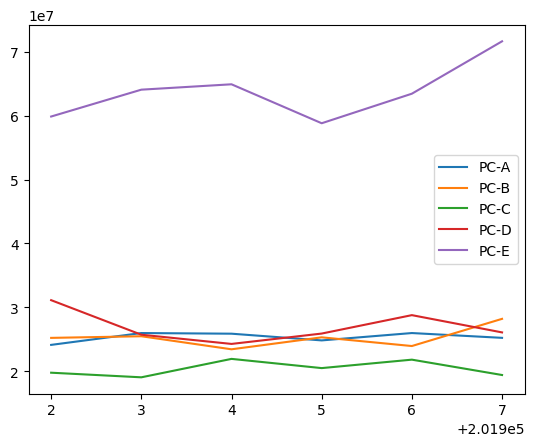

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(graph_data["payment_month"], graph_data["PC-A"], label='PC-A')
plt.plot(graph_data["payment_month"], graph_data["PC-B"], label='PC-B')
plt.plot(graph_data["payment_month"], graph_data["PC-C"], label='PC-C')
plt.plot(graph_data["payment_month"], graph_data["PC-D"], label='PC-D')
plt.plot(graph_data["payment_month"], graph_data["PC-E"], label='PC-E')
plt.legend()  